In [20]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.9.0
2.9.0


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [22]:
# load data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [23]:
X_train_full.shape

(60000, 28, 28)

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

X_test.shape

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_valid = np_utils.to_categorical(y_valid)

print(y_train)

# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import InputLayer

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(300,activation="sigmoid"))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.summary()

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=90, validation_data=(X_test, y_test))

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.2415 - accuracy: 0.9297


[0.24147717654705048, 0.9297000169754028]

In [36]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 185ms/step


array([[0.58, 0.01, 0.89, 0.97, 0.01, 0.66, 0.  , 1.  , 0.2 , 0.92],
       [0.94, 0.49, 1.  , 0.97, 0.  , 0.97, 0.97, 0.  , 0.87, 0.  ],
       [0.  , 1.  , 0.86, 0.6 , 0.08, 0.56, 0.44, 0.67, 0.6 , 0.19]],
      dtype=float32)

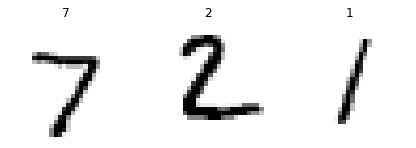

In [37]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(np.argmax(y_proba[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()